In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()




Saving order_products_prior_sample.csv to order_products_prior_sample.csv
Saving products_sample.csv to products_sample.csv
Saving orders_sample.csv to orders_sample.csv


In [ ]:
import pandas as pd


orders_sample = pd.read_csv('orders_sample.csv')
order_products_prior_sample = pd.read_csv('order_products_prior_sample.csv')
products_sample = pd.read_csv('products_sample.csv')





In [ ]:
merged_data = pd.merge(order_products_prior_sample, orders_sample, on='order_id', how='left')
merged_data = pd.merge(merged_data, products_sample, on='product_id', how='left')
print(merged_data.head())


   order_id  product_id  add_to_cart_order  reordered  user_id  order_number  \
0         1         101                  1          1       11             1   
1         1         102                  2          0       11             1   
2         2         101                  1          1       12             2   

   order_hour_of_day  days_since_prior_order product_name  
0                  9                       0        Apple  
1                  9                       0       Banana  
2                 16                       5        Apple  


In [ ]:
product_reorder_count = merged_data.groupby('product_id')['reordered'].sum().reset_index()
product_reorder_count.columns = ['product_id', 'reorder_times']
merged_data = pd.merge(merged_data, product_reorder_count, on='product_id', how='left')
merged_data['reorder_times'].fillna(0, inplace=True)
print(merged_data.head())


   order_id  product_id  add_to_cart_order  reordered  user_id  order_number  \
0         1         101                  1          1       11             1   
1         1         102                  2          0       11             1   
2         2         101                  1          1       12             2   

   order_hour_of_day  days_since_prior_order product_name  reorder_times  
0                  9                       0        Apple              2  
1                  9                       0       Banana              0  
2                 16                       5        Apple              2  


/tmp/ipython-input-9-2283497543.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['reorder_times'].fillna(0, inplace=True)


In [ ]:
features = merged_data[['order_number', 'add_to_cart_order', 'order_hour_of_day', 'days_since_prior_order', 'reorder_times']]
target = merged_data['reordered']
print(features.head())
print(target.head())


   order_number  add_to_cart_order  order_hour_of_day  days_since_prior_order  \
0             1                  1                  9                       0   
1             1                  2                  9                       0   
2             2                  1                 16                       5   

   reorder_times  
0              2  
1              0  
2              2  
0    1
1    0
2    1
Name: reordered, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features.fillna(0, inplace=True)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


/tmp/ipython-input-11-813103614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.8797 - val_accuracy: 1.0000 - val_loss: 0.5285
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0000e+00 - loss: 0.8275 - val_accuracy: 1.0000 - val_loss: 0.5319
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0000e+00 - loss: 0.7821 - val_accuracy: 1.0000 - val_loss: 0.5354
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.0000e+00 - loss: 0.7388 - val_accuracy: 1.0000 - val_loss: 0.5388
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.0000e+00 - loss: 0.6975 - val_accuracy: 1.0000 - val_loss: 0.5422
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.6589 - val_accuracy: 1.0000 - val_loss: 0.5456
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.6258 - val_accuracy: 1.0000 - val_loss: 0.5488
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.5944 - val_accuracy: 1.00

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Confusion Matrix:
 [[1]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


ROC AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [ ]:
model.save("product_reorder_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("product_reorder_model.h5")


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)



In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam()

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 1.0000 - loss: 0.5085 - val_accuracy: 1.0000 - val_loss: 0.5604
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 0.4816 - val_accuracy: 1.0000 - val_loss: 0.5627
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 1.0000 - loss: 0.4558 - val_accuracy: 1.0000 - val_loss: 0.5649
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 1.0000 - loss: 0.4312 - val_accuracy: 1.0000 - val_loss: 0.5671
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 1.0000 - loss: 0.4077 - val_accuracy: 1.0000 - val_loss: 0.5694
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 1.0000 - loss: 0.3852 - val_accuracy: 1.0000 - val_loss: 0.5715
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.3637 - val_accuracy: 1.0000 - val_loss: 0.5737
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 1.0000 - loss: 0.3431 - val_accuracy: 1.0000 - val_loss:

In [ ]:
!pip install scikit-learn matplotlib seaborn


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
ROC-AUC Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


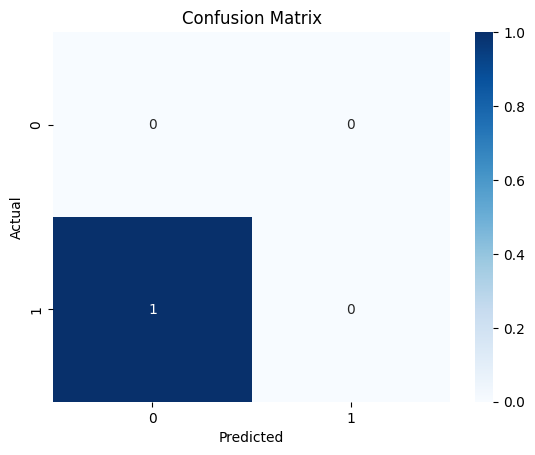

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


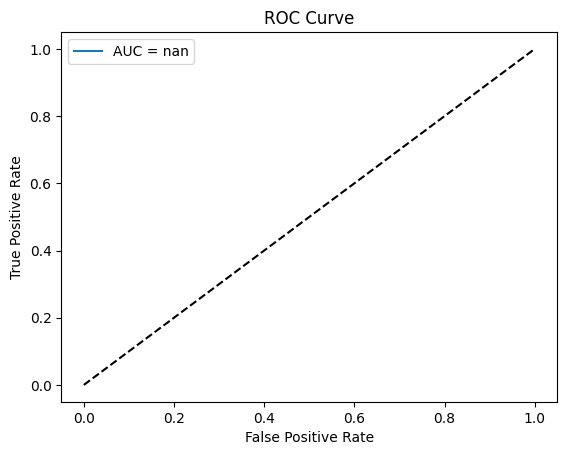

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on test data
y_pred_prob = model.predict(X_test).ravel()
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop])


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.1591

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 0.1591 - val_accuracy: 1.0000 - val_loss: 0.6032
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 1.0000 - loss: 0.1499 - val_accuracy: 1.0000 - val_loss: 0.6049
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 1.0000 - loss: 0.1413 - val_accuracy: 1.0000 - val_loss: 0.6066
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 1.0000 - loss: 0.1331 - val_accuracy: 1.0000 - val_loss: 0.6083


In [ ]:
model.save('product_reorder_prediction_model.h5')
print("Model saved successfully.")


Model saved successfully.


In [ ]:
print(merged_data['reordered'].value_counts())


reordered
1    2
0    1
Name: count, dtype: int64


In [ ]:
reorder_percentage = merged_data['reordered'].mean() * 100
print(f"Reorder Percentage: {reorder_percentage:.2f}%")


Reorder Percentage: 66.67%


In [ ]:
merged_data[merged_data['reordered'] == 1][['product_id', 'product_name']]


,product_id,product_name
0,101,Apple
2,101,Apple
